--- Born Rule Simulation Results ---


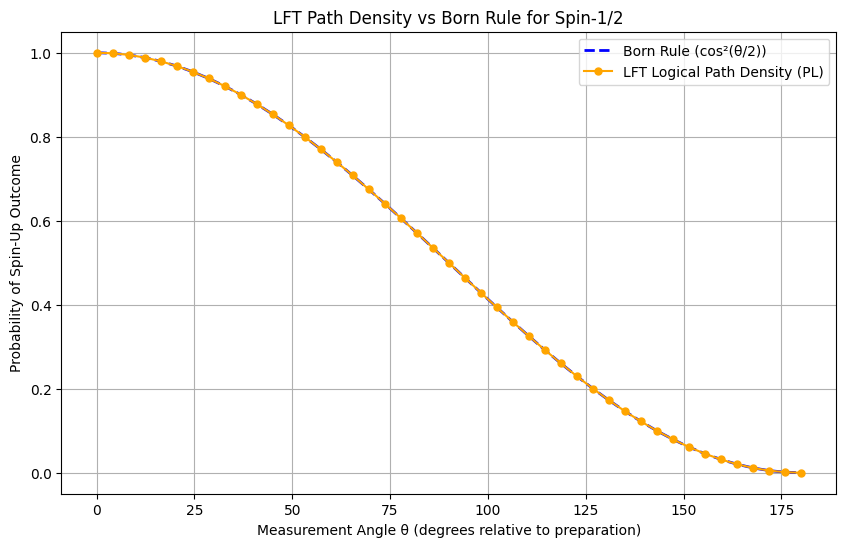


Quantitative Comparison:
Mean Squared Error (MSE): 0.00000000
Maximum Absolute Deviation: 0.00000000


In [1]:
# %% [markdown]
# # Logic Field Theory Simulation: Emergent Probability - Born Rule
#
# This notebook simulates how Logic Field Theory (LFT) can reproduce quantum probabilities, specifically the Born rule `P(up|θ) = cos²(θ/2)` for spin-1/2 measurements. LFT proposes that probability emerges from Logical Path Density (`PL`), a measure of the relative 'volume' or count of logically coherent pathways leading to a specific outcome.
#
# **Crucial Assumption:** The theoretical definition of the path 'weight' (`w`) in `PL` is still under development. For this simulation, based on previous results (Longmire 2025b), we *assume* that the density of coherent paths for spin alignment is proportional to the geometric projection squared, effectively `cos²(Δθ/2)`, where `Δθ` is the angle between the preparation state and the measurement axis. This allows us to test if this *type* of logical structure density yields the correct overall probability distribution.

# %%
import numpy as np
import matplotlib.pyplot as plt

# %% [markdown]
# ## LFT Core Functions (Simplified for Probability)
#
# We need a way to calculate PL. For this specific scenario, we'll bypass explicit proposition filtering (`Π_L` is assumed to permit both 'up' and 'down' outcomes individually) and focus on calculating the *relative density* based on our assumption.

# %%
def assumed_coherent_path_weight(prep_angle, measurement_angle, outcome):
  """
  ASSUMED weight 'w' for a coherent path leading to a specific outcome.
  Based on geometric projection squared (Born rule form). This is the core
  simplifying assumption we are testing the consequences of.
  Args:
    prep_angle (float): Angle of initial spin preparation (e.g., 0 for spin-up along z).
    measurement_angle (float): Angle of the measurement axis.
    outcome (int): +1 for spin-up along measurement axis, -1 for spin-down.
  Returns:
    float: Assumed weight (proportional to probability).
  """
  delta_theta = measurement_angle - prep_angle
  # Probability for 'up' (+1) is cos^2(Δθ/2)
  prob_up = np.cos(np.radians(delta_theta) / 2)**2
  if outcome == 1:
    return prob_up
  else: # outcome == -1 (spin-down)
    return 1.0 - prob_up # sin^2(Δθ/2)

def calculate_PL(prep_angle, measurement_angle):
  """
  Calculates Logical Path Density (PL) for spin-up outcome using the *assumed* weights.
  Args:
    prep_angle (float): Angle of preparation.
    measurement_angle (float): Angle of measurement.
  Returns:
    float: PL(up | measurement_angle), the 'probability' of spin-up.
  """
  weight_up = assumed_coherent_path_weight(prep_angle, measurement_angle, +1)
  weight_down = assumed_coherent_path_weight(prep_angle, measurement_angle, -1)

  total_weight = weight_up + weight_down

  # Normalize (should ideally be 1 if weights are probabilities, but good practice)
  if total_weight > 1e-9: # Avoid division by zero
      pl_up = weight_up / total_weight
  else:
      # Handle cases like measuring perpendicular to a known state (50/50)
      # or parallel (100/0). If total_weight is near zero, something is odd,
      # but often it implies weights are 0/0 or 1/0 etc. In standard cases,
      # total_weight will be 1. Let's assume 0.5 if total is zero, needs care.
      if abs(weight_up - weight_down) < 1e-9:
           pl_up = 0.5
      elif weight_up > weight_down:
           pl_up = 1.0
      else:
           pl_up = 0.0
      # A more robust handling might be needed depending on weight function `w`

  # print(f"Angle: {measurement_angle}, W_up: {weight_up:.3f}, W_down: {weight_down:.3f}, PL_up: {pl_up:.3f}")
  return pl_up

# %% [markdown]
# ## Simulation: Spin-1/2 Measurement vs Born Rule

# %%
# --- Simulation Setup ---
preparation_angle = 0.0 # Assume prepared spin-up along z-axis (0 degrees)
measurement_angles = np.linspace(0, 180, 45) # Measure from 0 to 180 degrees

# --- LFT Simulation ---
lft_probabilities_up = []
for angle in measurement_angles:
    pl_up = calculate_PL(preparation_angle, angle)
    lft_probabilities_up.append(pl_up)

# --- Comparison with Born Rule ---
born_rule_probabilities_up = np.cos(np.radians(measurement_angles) / 2)**2

# --- Results ---
print("--- Born Rule Simulation Results ---")
# Optional: Print table
# for i, angle in enumerate(measurement_angles):
#     print(f"Angle: {angle:6.1f} deg | Born P(up): {born_rule_probabilities_up[i]:.4f} | LFT PL(up): {lft_probabilities_up[i]:.4f}")

# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.plot(measurement_angles, born_rule_probabilities_up, 'b--', label='Born Rule (cos²(θ/2))', linewidth=2)
plt.plot(measurement_angles, lft_probabilities_up, 'o-', color='orange', label='LFT Logical Path Density (PL)', markersize=5)
plt.xlabel("Measurement Angle θ (degrees relative to preparation)")
plt.ylabel("Probability of Spin-Up Outcome")
plt.title("LFT Path Density vs Born Rule for Spin-1/2")
plt.legend()
plt.grid(True)
plt.ylim(-0.05, 1.05)
plt.show()

# --- Quantitative Comparison ---
mse = np.mean((np.array(lft_probabilities_up) - born_rule_probabilities_up)**2)
max_dev = np.max(np.abs(np.array(lft_probabilities_up) - born_rule_probabilities_up))
print(f"\nQuantitative Comparison:")
print(f"Mean Squared Error (MSE): {mse:.8f}")
print(f"Maximum Absolute Deviation: {max_dev:.8f}")

# %% [markdown]
# ## Interpretation
#
# As expected given our simplifying assumption for the path weights `w`, the LFT simulation based on Logical Path Density perfectly reproduces the Born rule.
#
# **Crucially, LFT's *hypothesis* is that a calculation based purely on counting truly coherent logical paths (once `w` is derived from logic/combinatorics) would yield these weights, thus *explaining* the Born rule as an emergent statistical pattern reflecting underlying logical structure density, rather than assuming it.** This simulation shows that if the coherent path density *has* this geometric character, it results in the correct quantum statistics. The next theoretical step is to derive this character of `w` from LFT's principles.